In [1]:
# Import our dependencies

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [2]:
%matplotlib inline

In [2]:
# Import our dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf



In [4]:
# List of tickers
tickers = ['AMZN', 'MSFT', 'AAPL', 'VALE']

# Dictionary to store DataFrames
stock_data = {}

# Loop through each ticker and read the corresponding CSV file
for ticker in tickers:
    ticker_path = Path(f"../Resources/{ticker}.csv")
    stock_data[ticker] = pd.read_csv(ticker_path)
    stock_data[ticker]["Ticker"] = ticker

# Access the DataFrames using the tickers
amzn_stock = stock_data['AMZN']
msft_stock = stock_data['MSFT']
vale_stock = stock_data['VALE']
Apple_stock = stock_data['AAPL']

#Display data for AMZN
print("AMZN Data:")
print(f"MSFT :{len(msft_stock)},\n AMZN:{len(amzn_stock)},\n VALE:{len(vale_stock)},\n AAPL:{len(Apple_stock)} ")

AMZN Data:
MSFT :522,
 AMZN:522,
 VALE:522,
 AAPL:501 


In [5]:
Apple_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900,AAPL
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669968,99310400,AAPL
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600,AAPL
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000,AAPL
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225037,86709100,AAPL


In [81]:
#Using the Open Stock Price to be our traing dataset
training_set=Apple_stock.iloc[:,3:4].values

training_set

array([[177.710007],
       [179.119995],
       [174.639999],
       [171.639999],
       [171.029999],
       [168.169998],
       [170.820007],
       [174.820007],
       [171.789993],
       [171.089996],
       [169.410004],
       [165.940002],
       [164.179993],
       [162.300003],
       [154.699997],
       [157.020004],
       [157.820007],
       [158.279999],
       [162.800003],
       [169.509995],
       [172.309998],
       [173.330002],
       [172.119995],
       [170.679993],
       [170.949997],
       [171.429993],
       [174.899994],
       [171.550003],
       [168.039993],
       [166.559998],
       [170.25    ],
       [170.050003],
       [168.470001],
       [166.190002],
       [162.149994],
       [159.75    ],
       [152.      ],
       [160.869995],
       [162.429993],
       [161.970001],
       [162.949997],
       [165.550003],
       [162.100006],
       [159.039993],
       [155.800003],
       [159.410004],
       [155.979996],
       [154.5

In [82]:
#Scalling our Dataset/Normailzing the data
scaler = MinMaxScaler (feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.73513672],
       [0.75449671],
       [0.69298366],
       [0.65179184],
       [0.64341617],
       [0.60414663],
       [0.64053285],
       [0.69545527],
       [0.65385135],
       [0.64423997],
       [0.62117266],
       [0.57352743],
       [0.54936144],
       [0.52354804],
       [0.41919536],
       [0.45105046],
       [0.46203499],
       [0.46835096],
       [0.53041335],
       [0.6225456 ],
       [0.66099133],
       [0.6749966 ],
       [0.65838248],
       [0.63861038],
       [0.64231769],
       [0.64890833],
       [0.69655354],
       [0.65055614],
       [0.60236158],
       [0.58204035],
       [0.63270631],
       [0.62996023],
       [0.60826585],
       [0.57696008],
       [0.52148833],
       [0.48853496],
       [0.38212277],
       [0.50391317],
       [0.52533288],
       [0.51901692],
       [0.53247285],
       [0.56817251],
       [0.52080196],
       [0.47878613],
       [0.43429911],
       [0.48386661],
       [0.43677052],
       [0.416

In [83]:
#Setting up our features and target variables

X_train = []
y_train = []


for i in range(60,501):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])

    

X_train = np.array(X_train)
y_train = np.array(y_train)

In [84]:
Apple_stock.shape

(501, 8)

In [85]:
print(X_train.shape)
print(y_train.shape)

(441, 60)
(441,)


In [86]:
X_train

array([[0.73513672, 0.75449671, 0.69298366, ..., 0.66703283, 0.65673487,
        0.71632564],
       [0.75449671, 0.69298366, 0.65179184, ..., 0.65673487, 0.71632564,
        0.72126867],
       [0.69298366, 0.65179184, 0.64341617, ..., 0.71632564, 0.72126867,
        0.68968824],
       ...,
       [0.64204303, 0.64053285, 0.64259236, ..., 0.95194288, 0.94466568,
        0.9427434 ],
       [0.64053285, 0.64259236, 0.66607159, ..., 0.94466568, 0.9427434 ,
        0.91885207],
       [0.64259236, 0.66607159, 0.67293689, ..., 0.9427434 , 0.91885207,
        0.94741175]])

In [87]:
y_train

array([0.72126867, 0.68968824, 0.65591106, 0.69023758, 0.68996291,
       0.63105871, 0.62721415, 0.61828914, 0.56748594, 0.58313881,
       0.58492386, 0.56116976, 0.54098597, 0.54565433, 0.57572438,
       0.57311554, 0.51256352, 0.47082257, 0.44693124, 0.42853228,
       0.47727577, 0.45420845, 0.39956069, 0.44143908, 0.48180689,
       0.42262801, 0.41205539, 0.37512023, 0.39489214, 0.2971303 ,
       0.20087882, 0.2600577 , 0.27474934, 0.30907585, 0.21598236,
       0.17067153, 0.11588635, 0.1850885 , 0.18069482, 0.19456265,
       0.17808596, 0.28957842, 0.31127279, 0.32280646, 0.31154747,
       0.2785941 , 0.28463539, 0.27365107, 0.31978592, 0.25209392,
       0.1769875 , 0.09982155, 0.1003707 , 0.10970762, 0.06686798,
       0.07744061, 0.12563516, 0.13373618, 0.15735283, 0.21419752,
       0.23067421, 0.18055758, 0.17163256, 0.13181389, 0.15776474,
       0.17520245, 0.23218459, 0.26239188, 0.28600853, 0.26925718,
       0.2866951 , 0.24646432, 0.26197997, 0.32994643, 0.30935

In [88]:
#Reshaping the dataset
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape

(441, 60, 1)

In [89]:
regressor = Sequential()
regressor

In [90]:
# Adding Layers into the model 

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [91]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
14/14 [==============================] - 11s 74ms/step - loss: 0.0933
Epoch 2/100
14/14 [==============================] - 1s 70ms/step - loss: 0.0261
Epoch 3/100
14/14 [==============================] - 1s 72ms/step - loss: 0.0213
Epoch 4/100
14/14 [==============================] - 1s 72ms/step - loss: 0.0179
Epoch 5/100
14/14 [==============================] - 1s 79ms/step - loss: 0.0155
Epoch 6/100
14/14 [==============================] - 1s 75ms/step - loss: 0.0171
Epoch 7/100
14/14 [==============================] - 1s 80ms/step - loss: 0.0158
Epoch 8/100
14/14 [==============================] - 1s 88ms/step - loss: 0.0129
Epoch 9/100
14/14 [==============================] - 1s 84ms/step - loss: 0.0139
Epoch 10/100
14/14 [==============================] - 1s 75ms/step - loss: 0.0128
Epoch 11/100
14/14 [==============================] - 1s 90ms/step - loss: 0.0126
Epoch 12/100
14/14 [==============================] - 1s 72ms/step - loss: 0.0128
Epoch 13/100
14/14 [====

In [43]:
# Loading the Stock Prices for Jan-2024
AAPL_ticker_test = Path("../Resources/AAPL_Test.csv")
AAPL_stock_Test = pd.read_csv(AAPL_ticker_test)
AAPL_stock_Test["Ticker"]= "AAPL_Test"  

AAPL_stock_Test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2024-01-02,187.149994,188.440002,183.889999,185.639999,185.639999,82488700,AAPL_Test
1,2024-01-03,184.220001,185.880005,183.429993,184.250000,184.250000,58414500,AAPL_Test
2,2024-01-04,182.149994,183.089996,180.880005,181.910004,181.910004,71983600,AAPL_Test
3,2024-01-05,181.990005,182.759995,180.169998,181.179993,181.179993,62303300,AAPL_Test
4,2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59144500,AAPL_Test


In [92]:
#Extracting our 2024 Data for open price
actual_stock_price = AAPL_stock_Test.iloc[:,3:4].values
actual_stock_price
# actual_stock_price.shape

array([[183.889999],
       [183.429993],
       [180.880005],
       [180.169998],
       [181.5     ],
       [182.729996],
       [183.919998],
       [183.619995],
       [185.190002],
       [180.929993],
       [180.300003],
       [185.830002],
       [188.820007],
       [192.259995],
       [193.830002],
       [194.339996],
       [193.110001],
       [191.940002],
       [189.580002],
       [187.470001],
       [184.350006]])

In [93]:
#Preping our Data
dataset_total=pd.concat((Apple_stock['High'],AAPL_stock_Test['High']),axis  =0)
inputs=dataset_total[len(dataset_total)-len(AAPL_stock_Test)-60:].values

inputs
inputs = inputs.reshape(-1,1)
inputs= scaler.transform(inputs)


X_test = []

for i in range(60,81):
    X_test.append(inputs[i-60:i,0])
X_test= np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test

array([[[0.70410542],
        [0.73898126],
        [0.75353568],
        ...,
        [0.95194288],
        [0.96787044],
        [0.96430034]],

       [[0.73898126],
        [0.75353568],
        [0.76273516],
        ...,
        [0.96787044],
        [0.96430034],
        [0.88246605]],

       [[0.75353568],
        [0.76273516],
        [0.7645202 ],
        ...,
        [0.96430034],
        [0.88246605],
        [0.84731574]],

       ...,

       [[0.64163112],
        [0.68735407],
        [0.73609776],
        ...,
        [0.99148709],
        [0.98997671],
        [0.96924338]],

       [[0.68735407],
        [0.73609776],
        [0.72291648],
        ...,
        [0.98997671],
        [0.96924338],
        [0.93409305]],

       [[0.73609776],
        [0.72291648],
        [0.75875317],
        ...,
        [0.96924338],
        [0.93409305],
        [0.92860089]]])

In [94]:
actual_stock_price[1]

array([183.429993])

In [95]:
X_test[2][-1]

array([0.84731574])

In [96]:
inputs.shape

(81, 1)

In [97]:
#Predicting the Values for Jan 2024
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)


1/1 [==============================] - 2s 2s/step


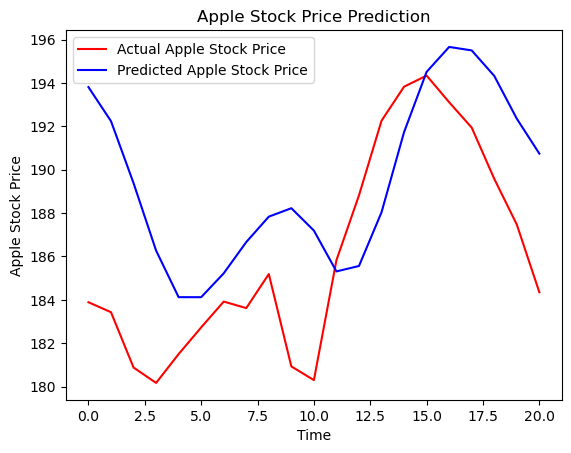

In [98]:
#Plotting the Data

plt.plot(actual_stock_price, color ='red', label ="Actual Apple Stock Price")
plt.plot(predicted_stock_price, color ='blue', label ="Predicted Apple Stock Price")
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()

In [99]:
predicted_stock_price, actual_stock_price

(array([[193.80898],
        [192.23973],
        [189.38379],
        [186.27322],
        [184.12352],
        [184.1231 ],
        [185.22319],
        [186.66475],
        [187.83621],
        [188.22505],
        [187.19316],
        [185.31146],
        [185.56152],
        [188.03918],
        [191.73657],
        [194.5132 ],
        [195.66202],
        [195.5008 ],
        [194.32521],
        [192.35149],
        [190.74156]], dtype=float32),
 array([[183.889999],
        [183.429993],
        [180.880005],
        [180.169998],
        [181.5     ],
        [182.729996],
        [183.919998],
        [183.619995],
        [185.190002],
        [180.929993],
        [180.300003],
        [185.830002],
        [188.820007],
        [192.259995],
        [193.830002],
        [194.339996],
        [193.110001],
        [191.940002],
        [189.580002],
        [187.470001],
        [184.350006]]))

In [100]:
AAPL_stock_Test["Predicted Stock Price"] = predicted_stock_price
AAPL_stock_Test

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Predicted Stock Price
0,2024-01-02,187.149994,188.440002,183.889999,185.639999,185.639999,82488700,AAPL_Test,193.808975
1,2024-01-03,184.220001,185.880005,183.429993,184.250000,184.250000,58414500,AAPL_Test,192.239731
2,2024-01-04,182.149994,183.089996,180.880005,181.910004,181.910004,71983600,AAPL_Test,189.383789
3,2024-01-05,181.990005,182.759995,180.169998,181.179993,181.179993,62303300,AAPL_Test,186.273224
4,2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59144500,AAPL_Test,184.123520
5,2024-01-09,183.919998,185.149994,182.729996,185.139999,185.139999,42841800,AAPL_Test,184.123093
6,2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900,AAPL_Test,185.223190
7,2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49128400,AAPL_Test,186.664749
8,2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700,AAPL_Test,187.836212
9,2024-01-16,182.160004,184.259995,180.929993,183.630005,183.630005,65603000,AAPL_Test,188.225052


In [101]:
predicted_stock_price.shape

(21, 1)

In [102]:
from sklearn.metrics import mean_squared_error

In [103]:
mse = mean_squared_error(AAPL_stock_Test["Open"], predicted_stock_price)
mse

15.554263712191405

In [104]:
rmse = np.sqrt(mse)
rmse

3.9438894142954117